TEAM ID: PNT2022TMID03798

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from pandas.api.types import is_numeric_dtype
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn import  metrics
sea.set()

sea.set_style("darkgrid")



%matplotlib inline

LOADING ABALONE DATASET

In [2]:
ab = pd.read_csv('abalone.csv', sep=',')

In [3]:
ab.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


**UNIVARIATE ANALYSIS**

Here, we analyze the target variable (Rings), size, weight and sex.

1) Target Variable (Ring)

C:\Users\govindahari\AppData\Local\Temp\ipykernel_5832\3576034763.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sea.distplot(ab['Rings'], kde=False, bins=range(0, 31, 2))
C:\Users\govindahari\AppData\Local\Temp\ipykernel_5832\3576034763.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sea.distplot(ab['

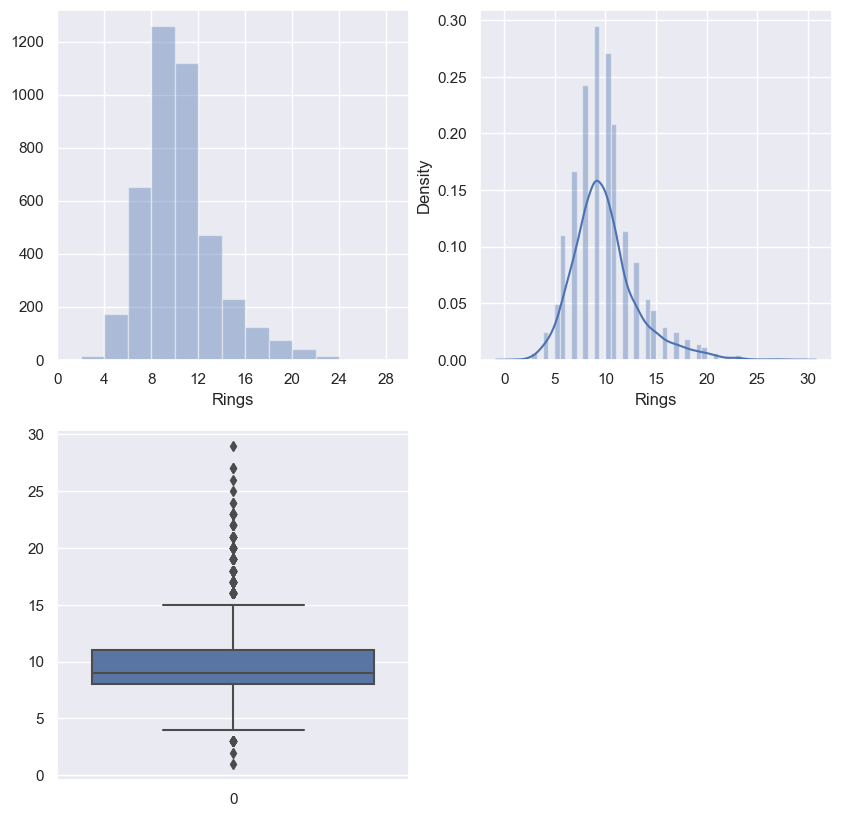

In [4]:
row = 2
col = 2
i = 0

plt.figure(figsize=(col * 5, row * 5))

i += 1
plt.subplot(row, col, i)
plt.xticks(range(0, 31, 4))
plt.xlim(0, 30)
_ = sea.distplot(ab['Rings'], kde=False, bins=range(0, 31, 2))

i += 1
plt.subplot(row, col, i)
_ = sea.distplot(ab['Rings'])

i += 1
plt.subplot(row, col, i)
plt.xticks(range(0, 31, 4))
plt.xlim(0, 30)
_ = sea.boxplot(ab['Rings'])

The analysis shows that the Ring attribute values ranges from 1 to 29 rings on an abalone specimen. However, the most frequent values of Rings are highly concentrated around the median of the distribution, so that, the 2nd and 3rd quartiles are defined in a range of less than 1 std deviation. We observe that its possible to approximate the distribution of this attribute to a normal curve.

2) Size attributes

Here, we analyze the attributes that represents the dimensions of an abalone. These attributes are Length, Diameter and Height. For each of these attributes we will plot two histograms and their respective boxplot. 

C:\Users\govindahari\AppData\Local\Temp\ipykernel_5832\1408529017.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sea.distplot(ab['Length'], color=colors[i % 3])
C:\Users\govindahari\AppData\Local\Temp\ipykernel_5832\1408529017.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sea.distplot(ab['Diameter'],

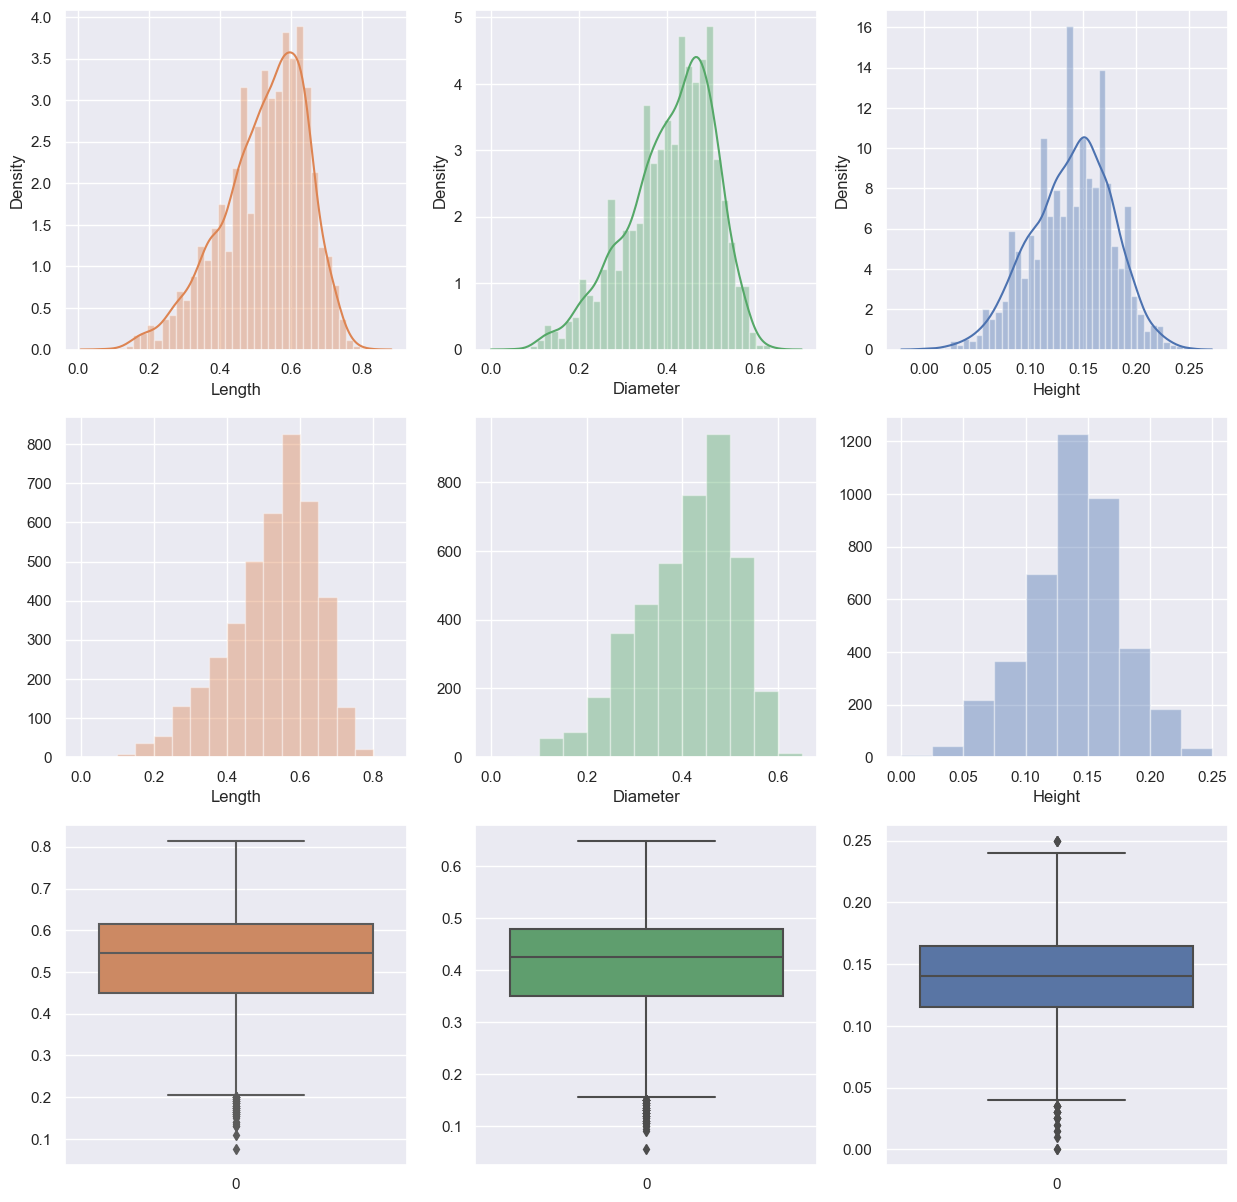

In [5]:
# removing outliers 
ab = ab[ab['Height'] < 0.4]

plt.figure(figsize=(15, 15))

colors = sea.color_palette()

lines = 3
rows = 3
i = 0

i += 1
plt.subplot(lines, rows, i)
_ = sea.distplot(ab['Length'], color=colors[i % 3])
    
i += 1
plt.subplot(lines, rows, i)
_ = sea.distplot(ab['Diameter'], color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sea.distplot(ab['Height'], color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sea.distplot(ab['Length'], kde=False, bins=np.arange(0.0, 0.9, 0.05), color=colors[i % 3])
    
i += 1
plt.subplot(lines, rows, i)
_ = sea.distplot(ab['Diameter'], kde=False, bins=np.arange(0.0, 0.7, 0.05), color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sea.distplot(ab['Height'], kde=False, bins=10, color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sea.boxplot(ab['Length'], color=sea.color_palette()[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sea.boxplot(ab['Diameter'], color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sea.boxplot(ab['Height'], color=colors[i % 3])

 Analyzing the Height boxplot, we conclude that the high peak is formed due the presence of two observations that lie far beyond the central positions of the distribution.

3) Weight Attributes

C:\Users\govindahari\AppData\Local\Temp\ipykernel_5832\3133918367.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sea.distplot(ab['Whole weight'], color=colors[i % col])
C:\Users\govindahari\AppData\Local\Temp\ipykernel_5832\3133918367.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sea.distplot(ab['Shu

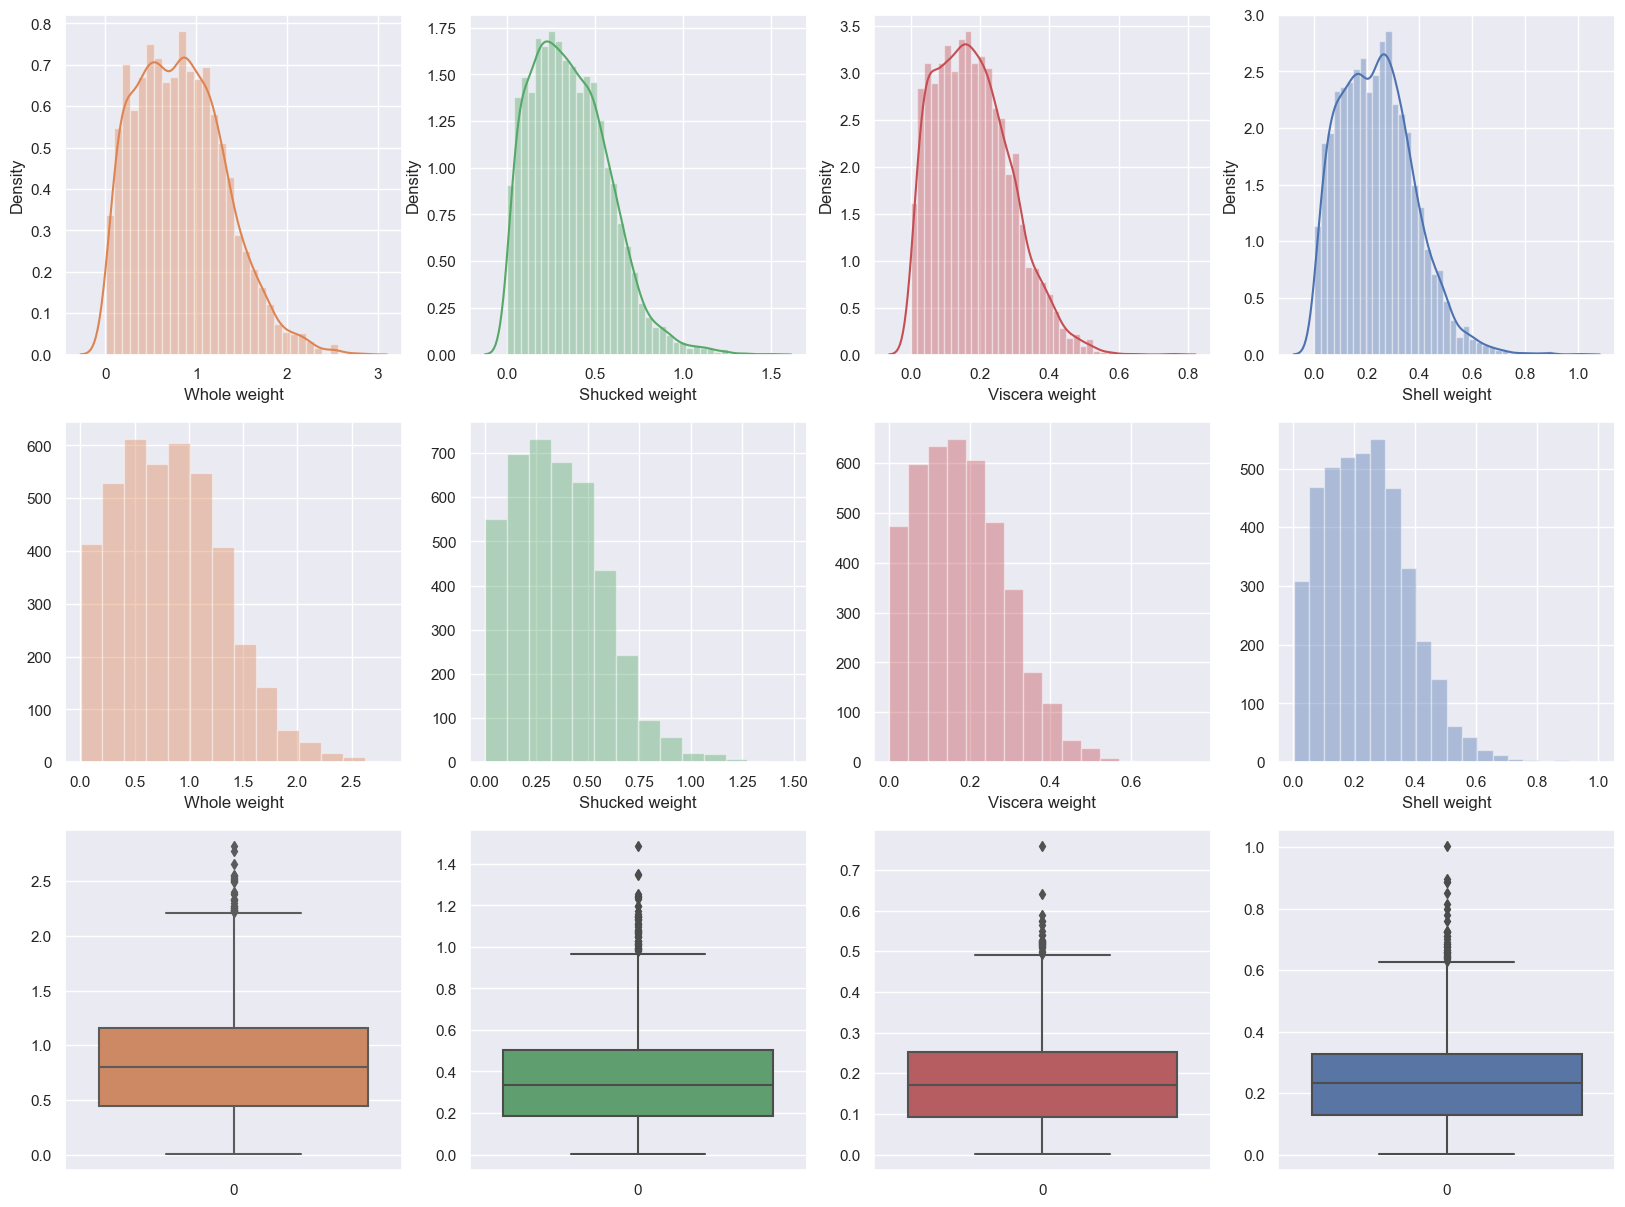

In [6]:
plt.figure(figsize=(20, 15))

colors = sea.color_palette()

row = 3
col = 4
i = 0

i += 1
plt.subplot(row, col, i)
_ = sea.distplot(ab['Whole weight'], color=colors[i % col])
    
i += 1
plt.subplot(row, col, i)
_ = sea.distplot(ab['Shucked weight'], color=colors[i % col])

i += 1
plt.subplot(row, col, i)
_ = sea.distplot(ab['Viscera weight'], color=colors[i % col])

i += 1
plt.subplot(row, col, i)
_ = sea.distplot(ab['Shell weight'], color=colors[i % col])

i += 1
plt.subplot(row, col, i)
_ = sea.distplot(ab['Whole weight'], kde=False, bins=14, color=colors[i % col])
    
i += 1
plt.subplot(row, col, i)
_ = sea.distplot(ab['Shucked weight'], kde=False, bins=14, color=colors[i % col])

i += 1
plt.subplot(row, col, i)
_ = sea.distplot(ab['Viscera weight'], kde=False, bins=16, color=colors[i % col])

i += 1
plt.subplot(row, col, i)
_ = sea.distplot(ab['Shell weight'], kde=False, bins=20, color=colors[i % col])

i += 1
plt.subplot(row, col, i)
_ = sea.boxplot(ab['Whole weight'], color=colors[i % col])

i += 1
plt.subplot(row, col, i)
_ = sea.boxplot(ab['Shucked weight'], color=colors[i % col])

i += 1
plt.subplot(row, col, i)
_ = sea.boxplot(ab['Viscera weight'], color=colors[i % col])

i += 1
plt.subplot(row, col, i)
_ = sea.boxplot(ab['Shell weight'], color=colors[i % col])

The weight attributes were analyzed following a similar approach to the Size attributes analysis. A similar distributions were observed, however, for the weight attributes the bell curve is a little larger.

4) Sex attribute

The Sex attribute is a categorical variable for which the possibles values are: M for Male, F for Female and I of Infant (an abalone which is not adult). 

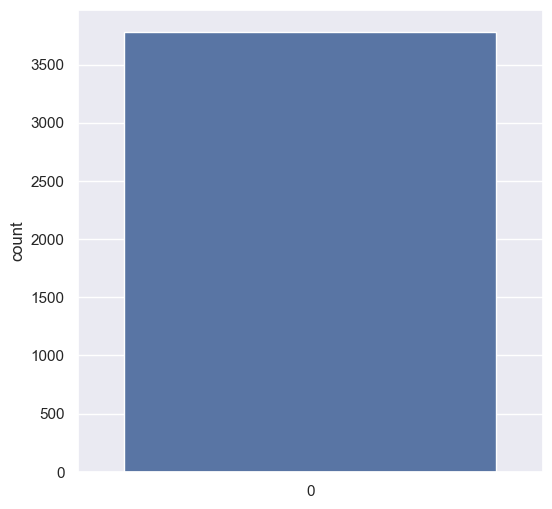

In [69]:
plt.figure(figsize=(6,6))
_ = sea.countplot(ab.Sex)

We analyzed the count of each category with a bar plot, and concluded that relative to this attribute, the dataset is balanced.

**BIVARATE ANALYSIS**

We take two variables and analyze how their relationship affects each other

1) (sex,ring) attribute

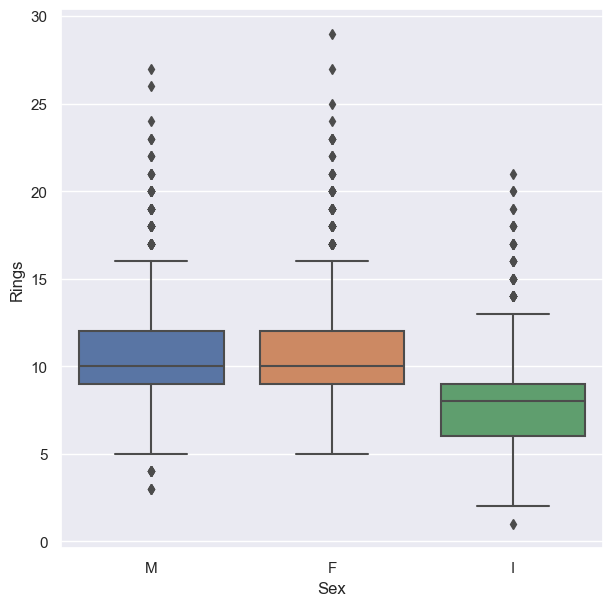

In [16]:
plt.figure(figsize=(7, 7))
_ = sea.boxplot(data=ab, x='Sex', y='Rings')

We observe that the median of Rings for the I category is lower than the median for M and F categories.

2) (Sex,height) attribute

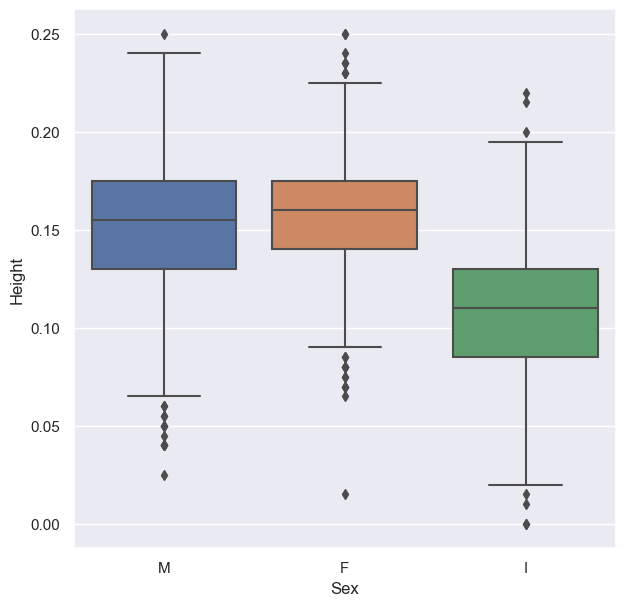

In [17]:
plt.figure(figsize=(7, 7))
_ = sea.boxplot(data=ab, x='Sex', y='Height')

C:\Users\govindahari\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\govindahari\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\govindahari\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


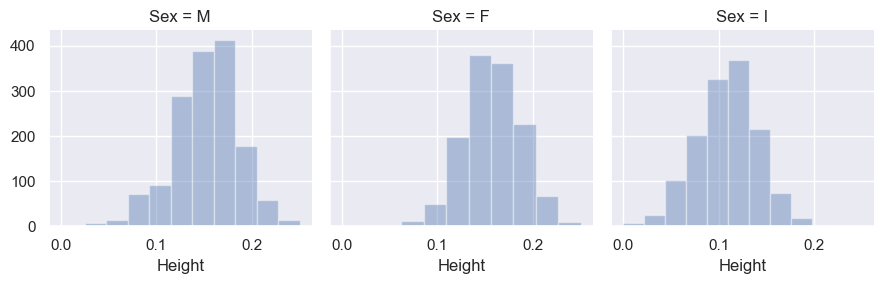

In [19]:
gp = sea.FacetGrid(ab, col='Sex', margin_titles=True)
_ = gp.map(sea.distplot, 'Height', kde=False, bins=10)

3) (Sex,shell weight) attribute

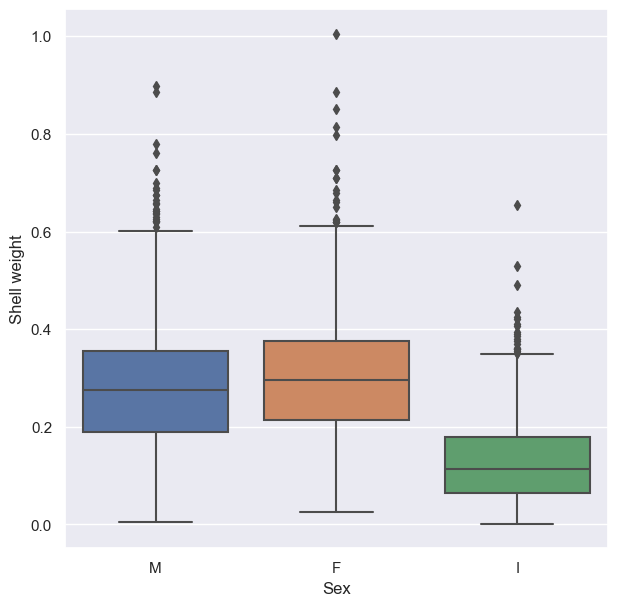

In [20]:
plt.figure(figsize=(7, 7))
_ = sea.boxplot(data=ab, x='Sex', y='Shell weight')


C:\Users\govindahari\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\govindahari\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\govindahari\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


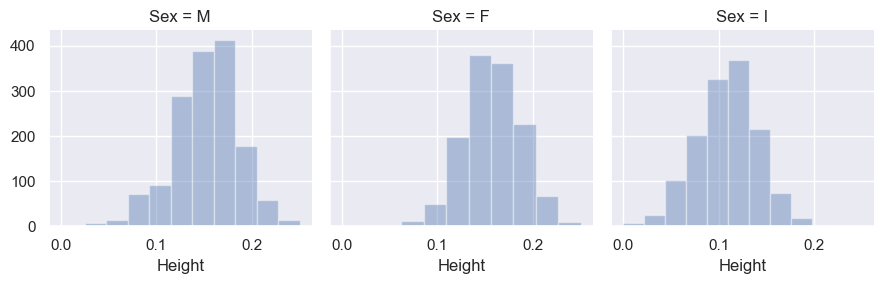

In [22]:
gp = sea.FacetGrid(ab, col='Sex', margin_titles=True)
_ = gp.map(sea.distplot, 'Height', kde=False, bins=10)

**MULTIVARIATE ANALYSIS**

Correlation matrix in Heatmap:

C:\Users\govindahari\AppData\Local\Temp\ipykernel_5832\2425563205.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = ab.corr()


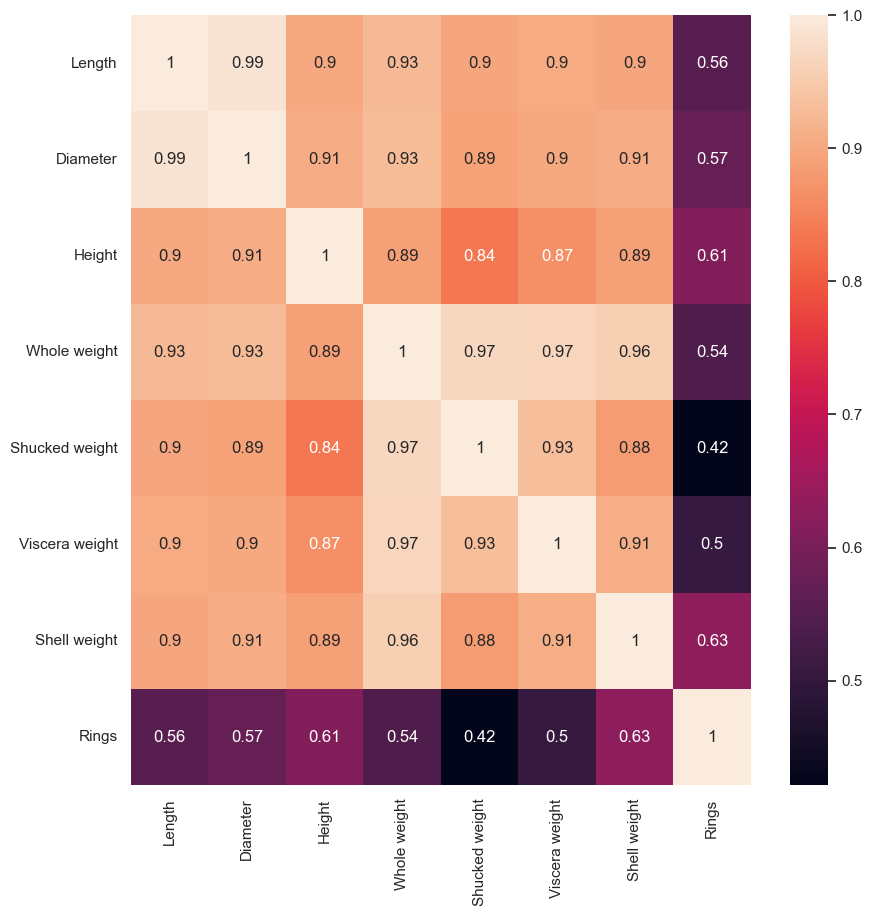

In [23]:
plt.figure(figsize=(10, 10))
corr = ab.corr()
_ = sea.heatmap(corr, annot=True)


Analyzing the correlation matrix, we notice that Height and Shell weight are the attributes that most correlates to Rings. Therefore, we concentrated the multivariate analysis on the correlation of these two attributes with Rings:

<Figure size 2000x500 with 0 Axes>

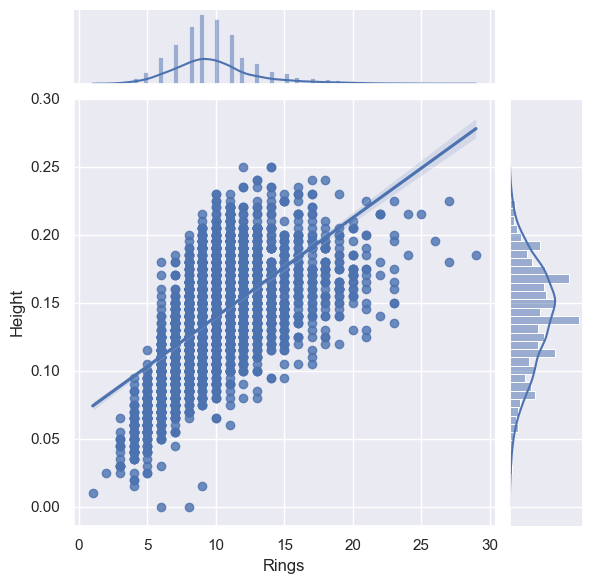

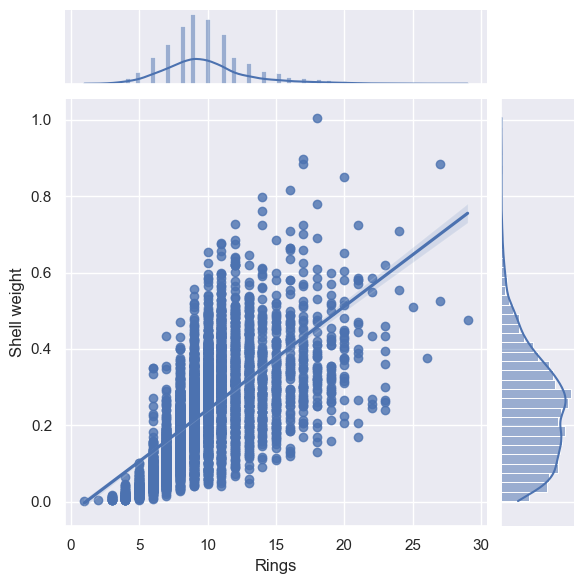

In [24]:
plt.figure(figsize=(20, 5))

_ = sea.jointplot(data=ab, x='Rings', y='Height', kind='reg')
_ = sea.jointplot(data=ab, x='Rings', y='Shell weight', kind='reg')

For lower values of Rings we have concentrated values of Height and Shell weight. As the value of Rings increases, the scatterplot becames larger, and for the highest values of Rings it become disperse.

**DESCRIPTIVE STATISTICS**

In [25]:
ab.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,4175.0,0.523965,0.120084,0.0750,0.45000,0.5450,0.61500,0.8150
Diameter,4175.0,0.407856,0.099230,0.0550,0.35000,0.4250,0.48000,0.6500
Height,4175.0,0.139189,0.038489,0.0000,0.11500,0.1400,0.16500,0.2500
Whole weight,4175.0,0.828468,0.490027,0.0020,0.44150,0.7995,1.15300,2.8255
Shucked weight,4175.0,0.359195,0.221713,0.0010,0.18600,0.3360,0.50175,1.4880
Viscera weight,4175.0,0.180536,0.109534,0.0005,0.09325,0.1710,0.25275,0.7600
Shell weight,4175.0,0.238791,0.139162,0.0015,0.13000,0.2340,0.32875,1.0050
Rings,4175.0,9.934132,3.224802,1.0000,8.00000,9.0000,11.00000,29.0000


**HANDLING WITH MISSING DATA**

To check missing values, we can use isnull() or notnull()

To replace values in missing cell, we can use fillna(),replace() and interpolate()

In [27]:
df = pd.DataFrame(ab)
df.isnull()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4172,False,False,False,False,False,False,False,False,False
4173,False,False,False,False,False,False,False,False,False
4174,False,False,False,False,False,False,False,False,False
4175,False,False,False,False,False,False,False,False,False


isnull() - returns true for NULL values

notnull() - returns false for NULL values(NaN)

In [28]:
df.fillna(0)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


Replacing the missing values with 0 using fillna

**OUTLIERS IN EACH ATTRIBUTES**  

<AxesSubplot: >

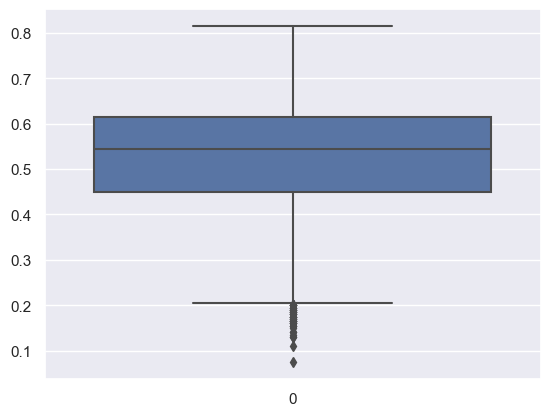

In [30]:
sea.boxplot(df['Length'])

<AxesSubplot: >

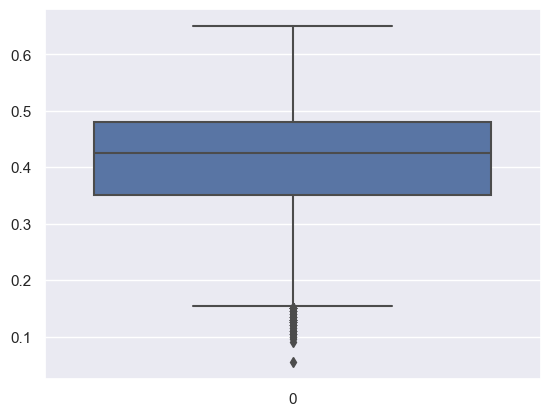

In [31]:
sea.boxplot(df['Diameter'])

<AxesSubplot: >

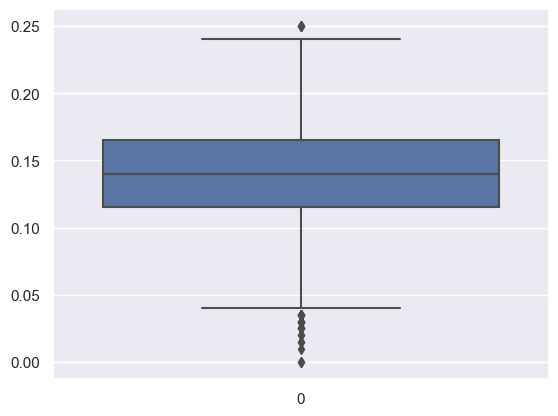

In [32]:
sea.boxplot(df['Height'])

<AxesSubplot: >

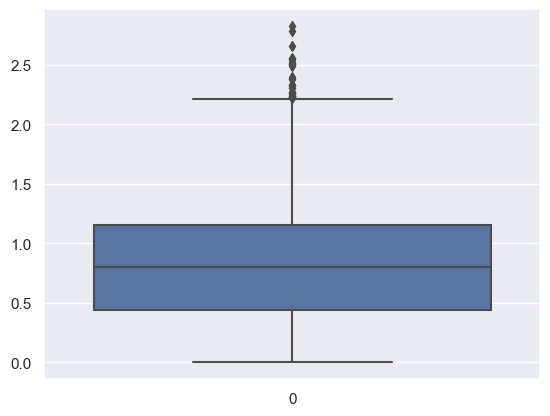

In [33]:
sea.boxplot(df['Whole weight'])

<AxesSubplot: >

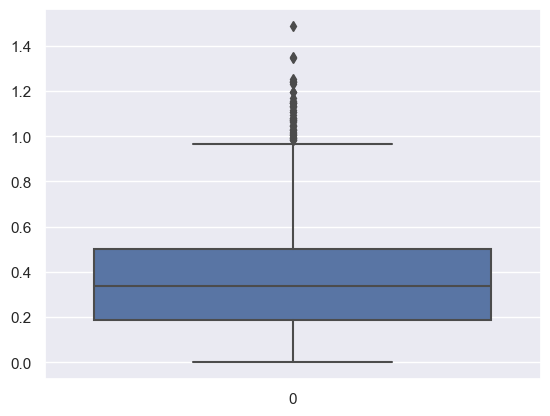

In [34]:
sea.boxplot(df['Shucked weight'])

<AxesSubplot: >

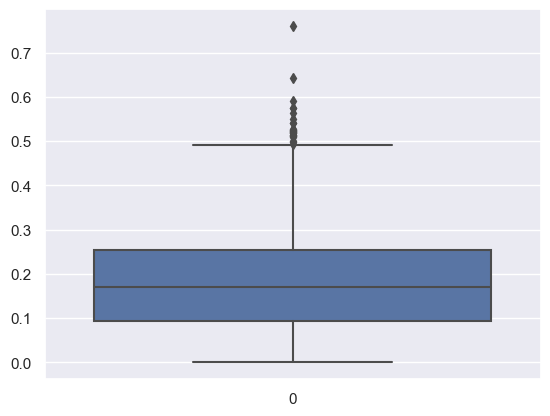

In [35]:
sea.boxplot(df['Viscera weight'])

<AxesSubplot: >

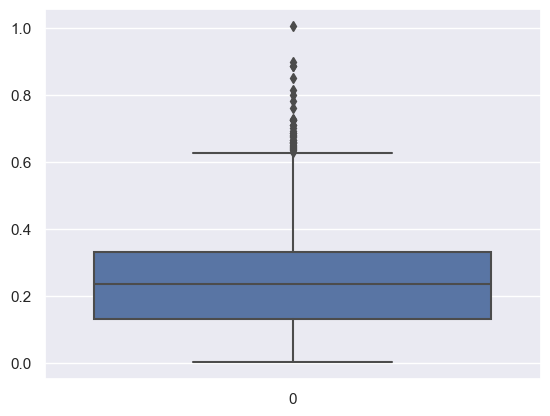

In [36]:
sea.boxplot(df['Shell weight'])

<AxesSubplot: >

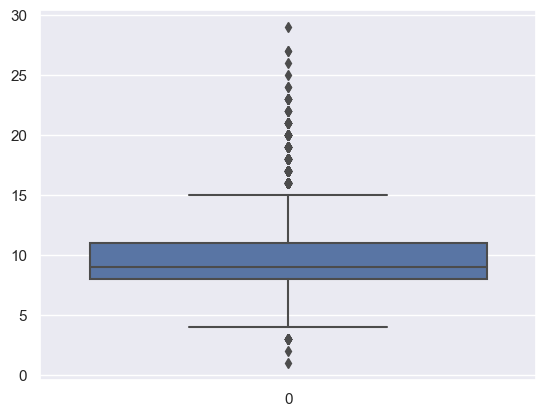

In [37]:
sea.boxplot(df['Rings'])

In [38]:
Q1 = ab.quantile(0.25)
Q3 = ab.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Length            0.16500
Diameter          0.13000
Height            0.05000
Whole weight      0.71150
Shucked weight    0.31575
Viscera weight    0.15950
Shell weight      0.19875
Rings             3.00000
dtype: float64


C:\Users\govindahari\AppData\Local\Temp\ipykernel_5832\2875972555.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = ab.quantile(0.25)
C:\Users\govindahari\AppData\Local\Temp\ipykernel_5832\2875972555.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = ab.quantile(0.75)


Removing outliers using IQR

In [39]:
ab = ab[~((ab < (Q1 - 1.5 * IQR)) |(ab > (Q3 + 1.5 * IQR))).any(axis=1)]
ab.shape

C:\Users\govindahari\AppData\Local\Temp\ipykernel_5832\144608122.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ab = ab[~((ab < (Q1 - 1.5 * IQR)) |(ab > (Q3 + 1.5 * IQR))).any(axis=1)]


(3781, 9)

<AxesSubplot: >

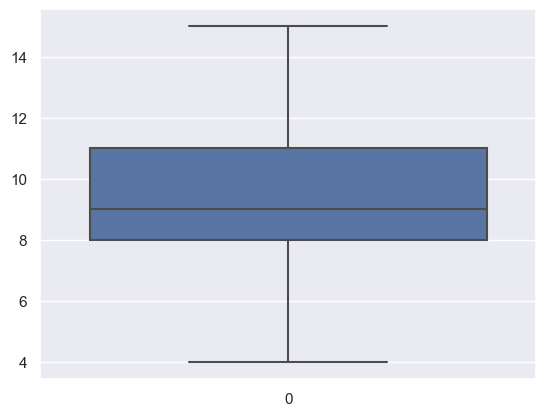

In [40]:
sea.boxplot(ab['Rings'])

<AxesSubplot: >

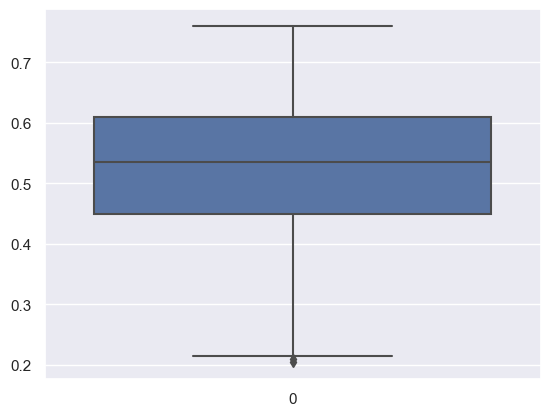

In [44]:
sea.boxplot(ab['Length'])

TEAM ID: PNT2022TMID03798

<AxesSubplot: >

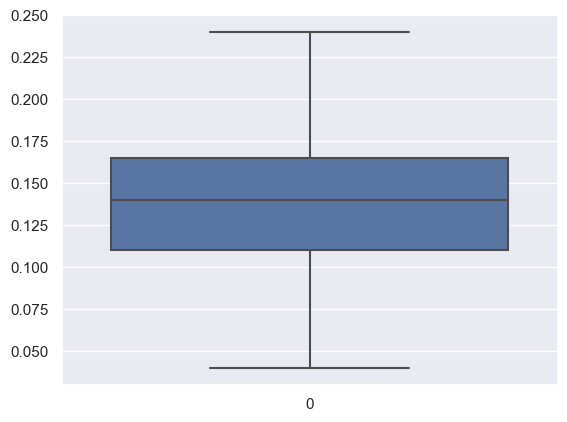

In [45]:
sea.boxplot(ab['Height'])


<AxesSubplot: >

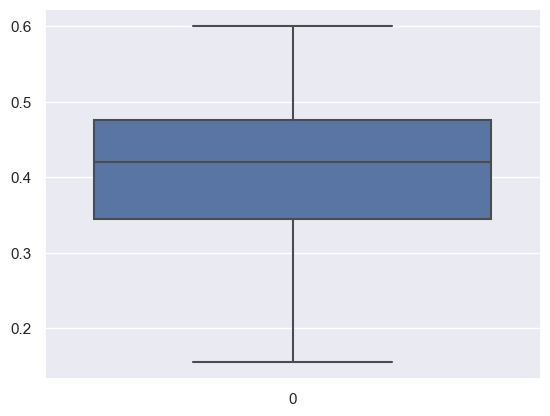

In [46]:
sea.boxplot(ab['Diameter'])


<AxesSubplot: >

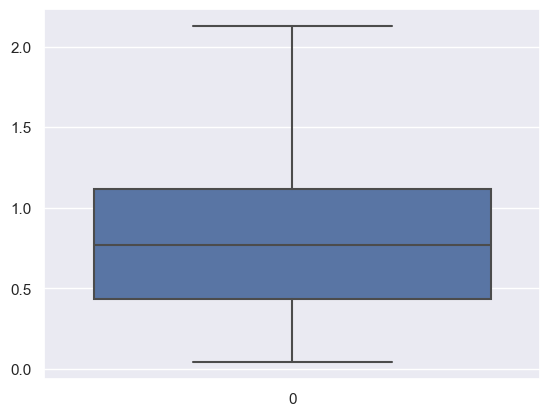

In [47]:
sea.boxplot(ab['Whole weight'])

<AxesSubplot: >

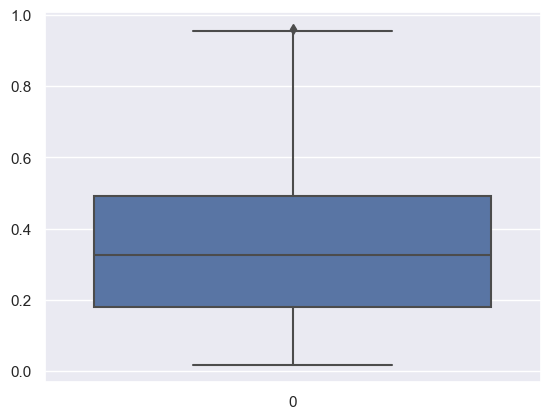

In [48]:
sea.boxplot(ab['Shucked weight'])

<AxesSubplot: >

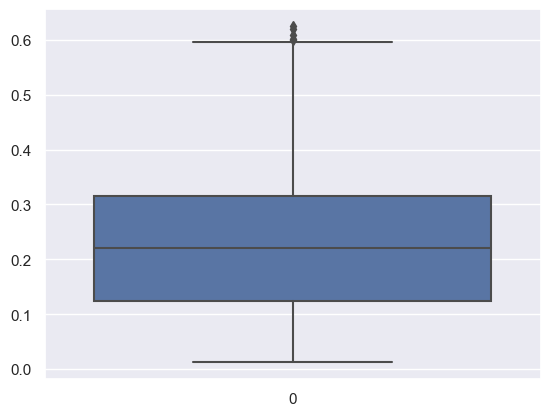

In [49]:
sea.boxplot(ab['Shell weight'])

<AxesSubplot: >

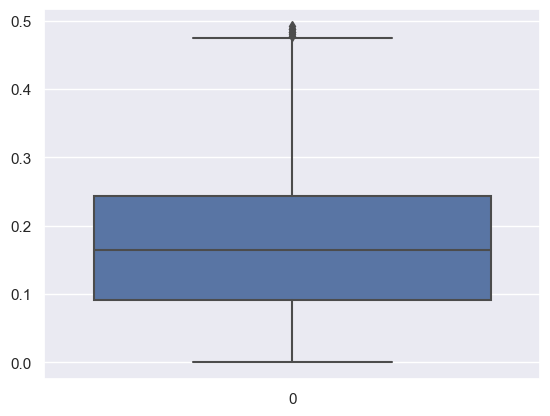

In [50]:
sea.boxplot(ab['Viscera weight'])

After removing the outliers, the above dataset has received.

TEAM ID: PNT2022TMID03798

**LABEL ENCODING OF CATEGORICAL DATA**

In [51]:
le=LabelEncoder()
ab['Sex']=le.fit_transform(ab['Sex'])

C:\Users\govindahari\AppData\Local\Temp\ipykernel_5832\1680231538.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab['Sex']=le.fit_transform(ab['Sex'])


In [52]:
ab

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


Above we have encoded the categorical data "Sex" as 0 or 1 or 2 based on M or F or I

8. Spliting the Data into dependent and Independent Variables

In [53]:
X = ab.iloc[:, :-1].values
y = ab.iloc[:, -1].values

9. Scaling independent variables

In [54]:
scaler = StandardScaler()
scaler.fit(ab)

StandardScaler()

10. Spliting training and test data

In [55]:
train_X,val_X,train_y,val_y = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [56]:
print("Shape of Training X :",train_X.shape)
print("Shape of Validation X :",val_X.shape)

Shape of Training X : (3024, 8)
Shape of Validation X : (757, 8)


In [57]:
print("Shape of Training y :",train_y.shape)
print("Shape of Validation y :",val_y.shape)

Shape of Training y : (3024,)
Shape of Validation y : (757,)


**LINEAR REGRESSION**

In [58]:
lr = LinearRegression()
lr.fit(train_X,train_y)


LinearRegression()

In [59]:
%%time
y_pred_val_lr = lr.predict(val_X)
print('MAE on Validation set :',metrics.mean_absolute_error(val_y, y_pred_val_lr))
print("\n")
print('MSE on Validation set :',metrics.mean_squared_error(val_y, y_pred_val_lr))
print("\n")
print('RMSE on Validation set :',np.sqrt(metrics.mean_absolute_error(val_y, y_pred_val_lr)))
print("\n")
print('R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_lr))
print("\n")

MAE on Validation set : 1.2719689486359298


MSE on Validation set : 2.7606215450501024


RMSE on Validation set : 1.127816008325795


R2 Score on Validation set : 0.5119499107890585


CPU times: total: 0 ns
Wall time: 3.99 ms


**SUPPORT VECTOR MACHINE**

In [60]:
svm = SVR()
svm.fit(train_X,train_y)


SVR()

In [61]:
%%time
y_pred_val_svm = svm.predict(val_X)
print('MAE on Validation set :',metrics.mean_absolute_error(val_y, y_pred_val_svm))
print("\n")
print('MSE on Validation set :',metrics.mean_squared_error(val_y, y_pred_val_svm))
print("\n")
print('RMSE on Validation set :',np.sqrt(metrics.mean_absolute_error(val_y, y_pred_val_svm)))
print("\n")
print('R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_svm))
print("\n")

MAE on Validation set : 1.2208952787270895


MSE on Validation set : 2.7012620714060267


RMSE on Validation set : 1.1049413010323623


R2 Score on Validation set : 0.5224440679687887


CPU times: total: 219 ms
Wall time: 255 ms


**DECISION TREE REGRESSOR**

In [62]:
dc = DecisionTreeRegressor(random_state = 0)
dc.fit(train_X,train_y)

DecisionTreeRegressor(random_state=0)

In [63]:
%%time
y_pred_val_dc = dc.predict(val_X)
print('MAE on Validation set :',metrics.mean_absolute_error(val_y, y_pred_val_dc))
print("\n")
print('MSE on Validation set :',metrics.mean_squared_error(val_y, y_pred_val_dc))
print("\n")
print('RMSE on Validation set :',np.sqrt(metrics.mean_absolute_error(val_y, y_pred_val_dc)))
print("\n")
print('R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_dc))
print("\n")

MAE on Validation set : 1.6393659180977542


MSE on Validation set : 4.88110964332893


RMSE on Validation set : 1.2803772561623212


R2 Score on Validation set : 0.13706896870869845


CPU times: total: 31.2 ms
Wall time: 3 ms


**OVERVIEW OF R2 SCORES OF ALL MODELS**

In [64]:
print('Logistic Regression R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_lr))
print('SVR R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_svm))
print('Decision Tree Regressor R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_dc))

Logistic Regression R2 Score on Validation set : 0.5119499107890585
SVR R2 Score on Validation set : 0.5224440679687887
Decision Tree Regressor R2 Score on Validation set : 0.13706896870869845
